In [1]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Signal y[n]')

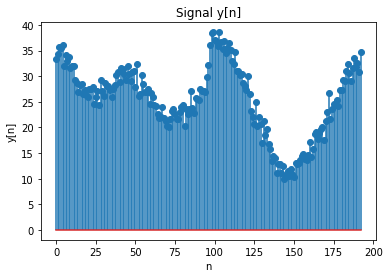

In [2]:

yn=[33.3735,34.3744,35.7514,35.5869,36.0826,31.9046,34.1604,32.8899,33.7345,31.7042,32.0472,31.9954,29.2099,28.6328
,26.879,28.234,28.4533,26.4562,27.2977,26.3674,26.0025,27.5698,27.4753,27.8671,24.565,25.9686,27.1948,24.4673,29.3415
,27.0769,26.1878,28.7746,28.1229,28.0572,27.2412,25.9975,27.509,28.3029,30.2193,30.7428,28.9521,31.5281,31.4678,30.4359
,29.3044,32.0193,30.4901,29.1049,30.8039,30.9927,27.8288,32.379,26.1485,26.4947,30.2314,28.4439,26.8432,26.9707,27.4959
,24.6287,26.7288,25.8782,24.299,24.1763,22.5418,21.8105,22.139,23.9021,21.7907,21.2762,20.3548,20.0346,21.6838,23.1861
,23.5318,22.666,21.5566,21.6734,22.9841,24.09,24.4396,20.234,23.5917,22.5824,23.6432,27.1993,23.8468,22.8253,25.8261
,25.6394,25.4367,27.5169,27.208,27.1316,26.8982,29.8031,32.1206,36.0268,38.4469,38.5914,36.9945,36.938,35.9048,38.5436
,36.6695,35.3315,36.8311,34.6094,35.4921,36.5117,35.0932,32.8906,32.3367,34.6908,30.946,30.9531,30.2894,30.4487,28.6813
,28.1587,27.3395,30.0342,26.6117,23.2711,21.9894,20.6231,24.8874,20.2186,22.0887,20.6506,16.8824,21.329,18.4568,19.6091
,16.7748,15.8912,13.5269,14.4964,14.107,11.1923,12.9435,12.8151,11.1801,12.5462,9.9419,10.7015,11.5785,10.4833,11.9865
,10.9006,10.2717,13.0854,12.8299,13.0692,13.5663,14.418,14.8122,13.875,13.6661,14.6942,17.2264,14.2535,15.7885,18.766
,19.1203,17.814,18.899,19.6421,20.1386,17.6416,21.2573,22.9984,26.7884,21.7178,23.567,24.5613,24.3632,25.3569,24.1146
,27.3306,27.286,29.3543,29.1628,31.1193,32.3875,30.6265,29.0392,31.5744,33.5967,31.7135,32.6819,30.926,34.7257]
N=len(yn)
x=np.linspace(0,N-1,N)
plt.stem(x,yn)
plt.ylabel("y[n]")
plt.xlabel('n')
plt.title('Signal y[n]')

Method 1

Text(0.5, 0, 'w')

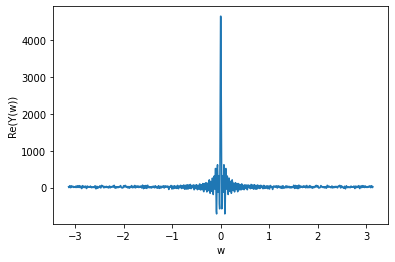

In [3]:
#calculating frequency response-Y(w)
w=np.linspace(-499*np.pi/500,499*np.pi/500,1000)   #w is the frequency(-pi to pi,in discrete from -0.998pi to 0.998pi at interval of 0.002pi)
reY,imY=0,0
for n in range(N):
    reY+=yn[n]*np.exp(-1*n*w*1j).real   #real part of Y(w)
    imY+=yn[n]*np.exp(-1*n*w*1j).imag   #imaginary part of Y(w)
plt.plot(w,reY)
plt.ylabel("Re(Y(w))")
plt.xlabel('w')

Text(0.5, 0, 'n')

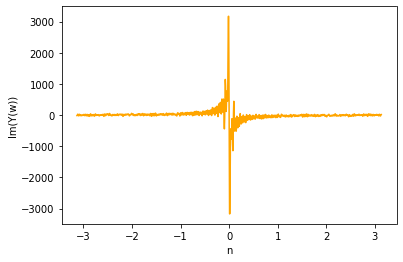

In [4]:
plt.plot(w,imY,color='orange')
plt.ylabel("Im(Y(w))")
plt.xlabel('n')

Text(0.5, 0, 'w')

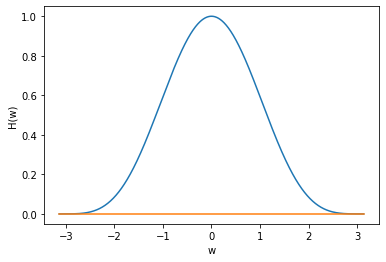

In [5]:
#Blur and its frequency response
def deblur(fn,w):
    F=(len(fn)-1)//2
    h=0
    for k in range(-F,F+1):
        h+=fn[k+F]*np.cos(k*w)   #real part of H(w)
        #imaginary part will be 0 as sin(kw) is odd function
    return h
hn=[1/16,4/16,6/16,4/16,1/16]   #bluring signal/matrix
reH=deblur(hn,w)
imH=0*w
plt.plot(w,reH)
plt.plot(w,imH)
plt.ylabel("H(w)")
plt.xlabel('w')

Text(0.5, 0, 'w')

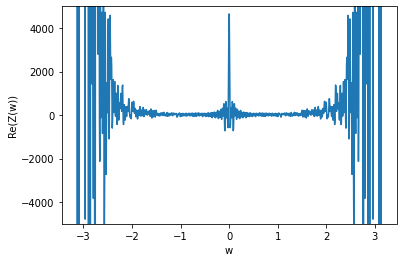

In [6]:
#Debluring
#Z(w)=Y(w)/H(w)
reZ=reY/reH   #real part to Z(w)
plt.plot(w,reZ)
plt.ylim(-5000,5000)
plt.ylabel("Re(Z(w))")
plt.xlabel('w')

Text(0.5, 0, 'w')

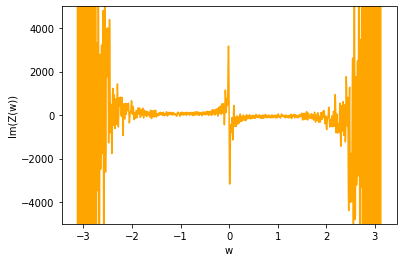

In [7]:
imZ=imY/reH   #imaginary part of Z(w)
plt.plot(w,imZ,color='orange')
plt.ylim(-5000,5000)
plt.ylabel("Im(Z(w))")
plt.xlabel('w')

Text(0, 0.5, 'Re(X1(w))')

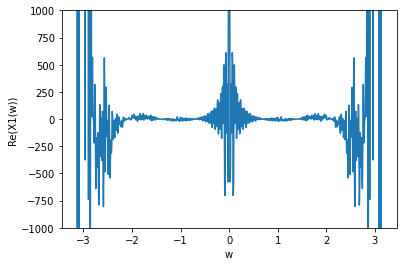

In [8]:
#Denoising (by averaging filter-convulation with 1/n[1 1 1 ....n times])
def denoise(n,w):
    #use of matrix of len 2n+1,sum of e^-jwk over -n to n
    x=1   #for center value- e^-jw0
    for k in range(1,n+1):
        x+=2*np.cos(w*k)
        #only real part,as sin(wn) would be odd so imaginary part is zero
    x/=(2*n)+1
    return x
#X(w)=Z(w)*D[w]  D[w] is denoising fourier transform
n=4
reX1=reZ*denoise(n,w)   #real part of X1(w)
imX1=imZ*denoise(n,w)   #imaginary part of X1(w)
plt.plot(w,reX1)
plt.ylim(-1000,1000)
plt.xlabel('w')
plt.ylabel('Re(X1(w))')

Text(0, 0.5, 'Im(X1(w))')

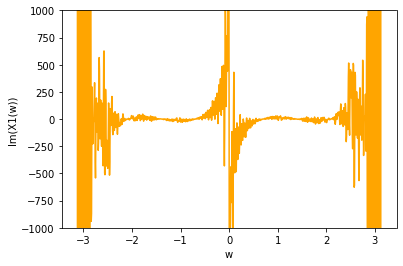

In [9]:
plt.plot(w,imX1,color='orange')
plt.ylim(-1000,1000)
plt.xlabel('w')
plt.ylabel('Im(X1(w))')

In [10]:
#low pass filter for sharpning
def filters(n,k):
    out=np.zeros(n)
    for i in range(n//2-k-1,n//2+k):
        out[i]+=1
    return out
lpf=filters(1000,250)

[19.1562, 22.5549, 26.8634, 31.543, 34.7662, 35.2605, 33.9421, 32.8301, 32.594, 32.2735, 31.2844, 30.3244, 29.9811, 29.7155, 28.8929, 27.8757, 27.3635, 27.3375, 27.3324, 27.2068, 27.0412, 26.76, 26.4117, 26.3736, 26.7498, 27.0168, 26.8016, 26.5522, 26.8349, 27.3884, 27.5554, 27.3323, 27.2795, 27.591, 27.9472, 28.1833, 28.4577, 28.7973, 29.066, 29.3681, 29.9192, 30.5176, 30.7078, 30.5091, 30.4192, 30.6082, 30.6713, 30.3343, 29.872, 29.6011, 29.4337, 29.1902, 28.922, 28.6501, 28.1917, 27.5558, 27.1256, 27.0865, 27.009, 26.4098, 25.4652, 24.7407, 24.4079, 24.1558, 23.7349, 23.1659, 22.5073, 21.8532, 21.5095, 21.7195, 22.1767, 22.2491, 21.8118, 21.4756, 21.795, 22.5519, 23.0599, 22.9764, 22.5925, 22.4378, 22.7704, 23.3841, 23.8143, 23.8031, 23.6106, 23.7569, 24.4143, 25.2021, 25.6525, 25.7316, 25.8082, 26.2591, 27.2294, 28.6363, 30.2194, 31.639, 32.7154, 33.6126, 34.6658, 35.948, 37.0684, 37.5121, 37.2043, 36.6393, 36.3561, 36.3686, 36.2683, 35.8256, 35.2398, 34.7646, 34.372, 33.9139, 33.3

Text(0.5, 1.0, 'x1[n]')

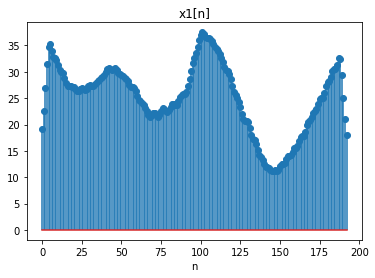

In [22]:
#inverse fourier transform to get x1[n]
x1n=[]
for n in range(N):
    c=round((sum(reX1*np.cos(n*w)*lpf)-sum(imX1*np.sin(n*w)*lpf))/1000,4)   #x1[n] is real,so imaginary part is 0
    x1n.append(c)
print(x1n)
x=np.linspace(0,N-1,N)
plt.stem(x,x1n)
plt.xlabel('n')
plt.title('x1[n]')

Method 2

Text(0, 0.5, 'Re(Z2(w))')

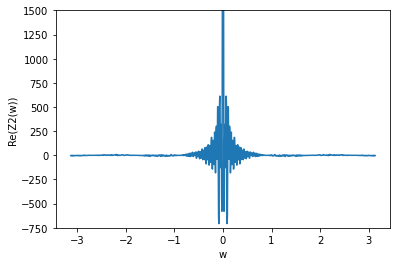

In [12]:
#Denoising Y(w) to get Z2(w)
n=3
reZ2=reY*denoise(n,w)   #real part of X1(w)
imZ2=imY*denoise(n,w)   #imaginary part of X1(w)
plt.plot(w,reZ2)
plt.ylim(-750,1500)
plt.xlabel('w')
plt.ylabel('Re(Z2(w))')

Text(0, 0.5, 'Im(Z2(w))')

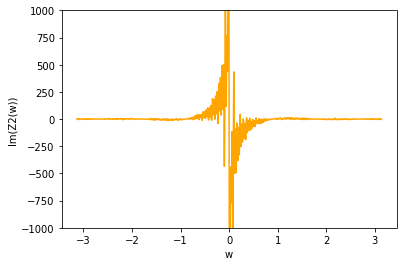

In [13]:
plt.plot(w,imZ2,color='orange')
plt.ylim(-1000,1000)
plt.xlabel('w')
plt.ylabel('Im(Z2(w))')

Text(0, 0.5, 'Re(X2(w))')

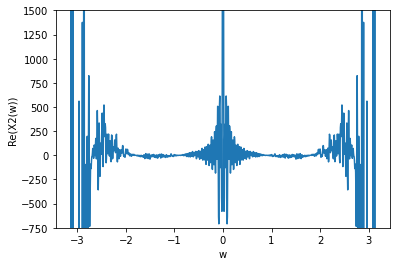

In [14]:
#Debluring of Z2(w) to get X2(w)
reX2=reZ2/reH
imX2=imZ2/reH
plt.plot(w,reX2)
# plt.plot(w,reX1)
plt.ylim(-750,1500)
plt.xlabel('w')
plt.ylabel('Re(X2(w))')

Text(0, 0.5, 'Im(X2(w))')

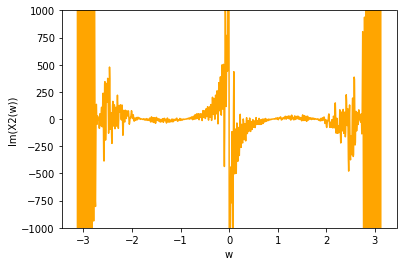

In [15]:
plt.plot(w,imX2,color='orange')
# plt.plot(w,imX1)
plt.ylim(-1000,1000)
plt.xlabel('w')
plt.ylabel('Im(X2(w))')

[19.2472, 24.296, 31.0687, 35.7461, 35.94, 33.9544, 33.0823, 33.4247, 33.2177, 32.1546, 31.2518, 30.7362, 30.0353, 29.1522, 28.5203, 28.0203, 27.3584, 26.9049, 27.0801, 27.4049, 27.1692, 26.5969, 26.4099, 26.638, 26.7476, 26.6028, 26.499, 26.5591, 26.7762, 27.2654, 27.8527, 27.9294, 27.387, 27.0853, 27.6178, 28.2926, 28.2927, 28.151, 28.8622, 30.0817, 30.6147, 30.3803, 30.3901, 30.8637, 30.9302, 30.378, 30.1338, 30.5377, 30.6153, 29.7847, 28.9574, 29.0074, 29.2836, 28.7622, 27.7793, 27.3792, 27.5598, 27.4325, 26.7668, 26.153, 25.7775, 25.1887, 24.3251, 23.7321, 23.5609, 23.2506, 22.4914, 21.7493, 21.5089, 21.623, 21.7321, 21.7806, 21.8217, 21.8199, 21.9242, 22.4166, 23.0896, 23.2323, 22.6512, 22.1737, 22.5855, 23.4864, 23.863, 23.5474, 23.3722, 23.9049, 24.7294, 25.1924, 25.3001, 25.502, 25.9514, 26.4409, 26.9526, 27.8368, 29.3331, 31.1802, 32.8894, 34.2792, 35.5363, 36.7601, 37.6506, 37.794, 37.2131, 36.4885, 36.2253, 36.4168, 36.4686, 35.9482, 35.1622, 34.7291, 34.6572, 34.298, 33.34

Text(0.5, 1.0, 'x2[n]')

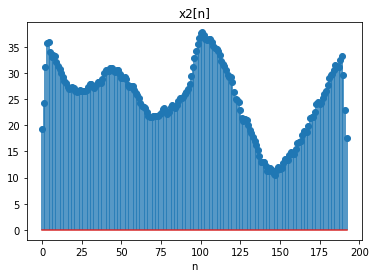

In [21]:
#reverse fourier of X2(w) to get x2[n]
x2n=[]
for n in range(N):
    c=round((sum(reX2*np.cos(n*w)*lpf)-sum(imX2*np.sin(n*w)*lpf))/1000,4)   #x2[n] is real,so imaginary part is 0
    x2n.append(c)
print(x2n)
x=np.linspace(0,N-1,N)
plt.stem(x,x2n)


Text(0.5, 1.0, 'x[n]')

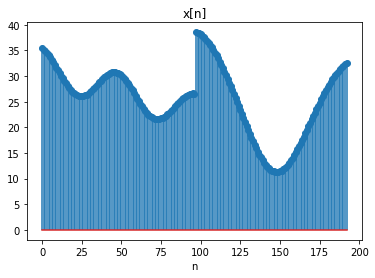

In [23]:
xn=[35.4312,35.1511,34.8284,34.4656,34.0656,33.6319,33.1689,32.6809,32.1733,31.6515,31.1213,30.5888,30.0605,29.5425,29.0412,28.5629
,28.1135,27.6986,27.3234,26.9924,26.7097,26.4785,26.3012,26.1795,26.1141,26.1046,26.15,26.2482,26.3961,26.5898,26.8247,27.0953
,27.3956,27.7188,28.058,28.4056,28.7542,29.0961,29.4237,29.7297,30.0071,30.2495,30.4508,30.6061,30.7107,30.7613,30.7553,30.6912
,30.5684,30.3875,30.15,29.8584,29.5162,29.1278,28.6985,28.234,27.7409,27.2262,26.6971,26.1613,25.6264,25.0999,24.5893,24.1015,23.6434
,23.2208,22.8394,22.5037,22.2177,21.9843,21.8056,21.6829,21.6163,21.6051,21.6477,21.7418,21.8839,22.0702,22.296,22.5562,22.8451
,23.1568,23.4851,23.8236,24.166,24.506,24.8375,25.1545,25.4517,25.7238,25.9663,26.1749,26.3462,26.4771,26.5652,26.6086,26.606,38.5567
,38.4605,38.3174,38.1283,37.8941,37.6161,37.2959,36.9352,36.5361,36.1006,35.6306,35.1284,34.5959,34.0352,33.4482,32.8367,32.2025
,31.5472,30.8724,30.1795,29.4701,28.7456,28.0073,27.2567,26.4954,25.725,24.9471,24.1638,23.3771,22.5892,21.8027,21.0201,20.2445,19.4788
,18.7264,17.9907,17.2752,16.5838,15.92,15.2876,14.6904,14.1319,13.6156,13.1448,12.7226,12.3517,12.0345,11.773,11.5689,11.4232,11.3368
,11.3098,11.3421,11.4329,11.581,11.7848,12.0423,12.3511,12.7084,13.1112,13.5562,14.0399,14.5587,15.1089,15.6868,16.2886,16.9106
,17.5492,18.2011,18.8629,19.5315,20.2041,20.878,21.5506,22.2198,22.8834,23.5395,24.1865,24.8226,25.4464,26.0563,26.651,27.2291,27.789
,28.3294,28.8485,29.3448,29.8166,30.2619,30.6789,31.0656,31.4198,31.7396,32.0228,32.2673,32.4714]
plt.stem(x,xn)
plt.xlabel('n')
plt.title('x[n]')

Comparision

Text(0.5, 1.0, 'x[n] v/s y[n]')

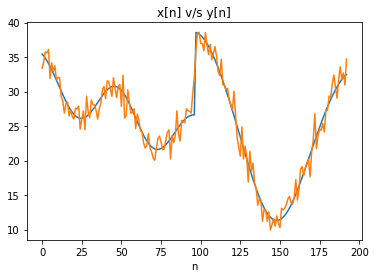

In [24]:
plt.plot(x,xn)
plt.plot(x,yn)
plt.xlabel('n')
plt.title('x[n] v/s y[n]')

Text(0.5, 1.0, 'x[n] v/s x1[n] v/s x2[n]')

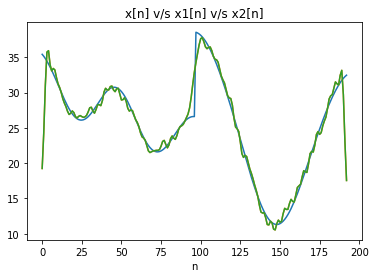

In [25]:
plt.plot(x,xn)
plt.plot(x,x2n)
plt.plot(x,x2n)
plt.xlabel('n')
plt.title('x[n] v/s x1[n] v/s x2[n]')

                                                                            End